In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
os.listdir("data")

np.random.seed(1)

def quantile_loss(y_actual, y_predict):
    """
    Cost function to minimise
    - y_actual: the actual number of core hours consumed by the simulation (array-like)
    - y_predict: the model's prediction (array-like of same length as above)
    - returns positive number, the lower the better
    """
    quantile = 0.9
    errors = np.maximum((y_actual - y_predict) * quantile, (y_predict - y_actual) * (1.0 - quantile))
    return np.mean(errors)

In [2]:
df = pd.read_csv("data/emod3d_train_x.csv")
y = pd.read_csv("data/emod3d_train_y.csv").core_hours
xtrain, xtest, ytrain, ytest = train_test_split(df, y)
test_x = pd.read_csv("data/emod3d_test_x.csv")

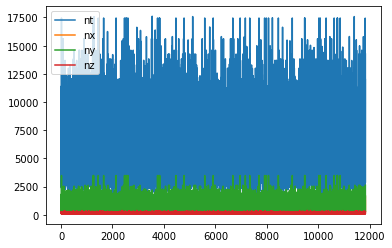

In [3]:
df[["nt", "nx", "ny", "nz"]].plot()

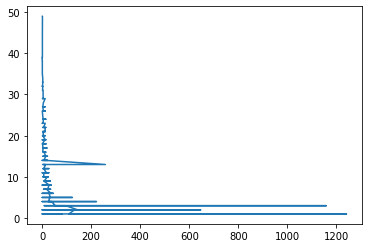

In [4]:
y.value_counts().plot()

In [5]:
model = XGBRegressor()
model.fit(xtrain, ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [6]:
pred = model.predict(xtest)
quantile_loss(ytest, pred)

1.358501717140822

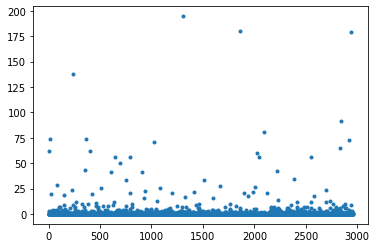

In [7]:
quantile = 0.9
errors = np.maximum((ytest - pred) * quantile, (pred - ytest) * (1.0 - quantile))
plt.scatter(range(len(pred)), errors, marker='.')

In [8]:
test_pred = model.predict(test_x)
np.savetxt("emod3d_test_y.csv", test_pred, fmt='%s')
!head "emod3d_test_y.csv"

15.106844
326.19943
90.67849
124.45653
432.93546
21.63178
22.281109
4.7900977
0.6818776
33.167774
